# Introduction
***In this notebook we will focus Multi-Class Prediction of Obesity Risk dataset in this code. It is playgorund series. We can say it is like real life problems. I will try to review this code from a beginner view. If you are ready, let's go!***


**We will have some parts in this code. These parts include every part of data science life cycle. If you want to be a succesfull data scientist/analyst/engineer, you shouldn't pass these life cycle steps!**

<font color = 'darkblue'>
Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Column Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)
11. [Prediction and Submission](#14)

<a id = "1"></a><br>
# Problem Definition and Project Planning

## Problem Definition

This project aims to develop a predictive model that identifies individuals with a higher risk of obesity. Obesity is a significant health concern linked to cardiovascular disease.

### Project Planning

#### Understanding the Objective

Our main goal is to find the most optimal **submission.csv** file. The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

#### Data Explanation

**Data Split:**

The dataset is divided into two groups:

- **Training set (train.csv):** the training dataset; NObeyesdad is the categorical target
- **Test set (test.csv):**  the test dataset; your objective is to predict the class of NObeyesdad for each row

**Import Libraries**

We will import the necessary libraries to perform data analysis and build machine learning models.

**Load and Check Data**

We will read and check the Multi-Class Prediction of Obesity Risk dataset in CSV format.
**Understand Dataset**

We will explore the dataset to gain a comprehensive understanding of its structure and contents.

**Column Description**

We will review columns.

**Exploratory Data Analysis (EDA)**

We will conduct Exploratory Data Analysis to deepen our understanding of the dataset. This includes visualizing data to uncover patterns and relationships.

**Basic Data Analysis**

We will perform basic data analysis to gain insights into the dataset.

**Data Cleaning**

We will clean the data by addressing issues such as duplicates, missing values, reformatting data types, checking and handling outliers, and validating.

**Feature Engineering**

We will focus on feature engineering to enhance the dataset for better model performance.

**Modelling**

We will choose the best machine learning model for predicting customer transactions based on the dataset.

**Submission File**

We will create the submission file, adhering to the required format.

Now, let's proceed with the code implementation according to these planned steps. Understanding each step is crucial for a comprehensive data science approach. Happy coding!

<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_18/3803698544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


<a id = "3"></a><br>
# Load and Check Data
We will load and check data in this step.

We need to assign train_df and test_df in here. 

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

We will see our train dataframe in the below!

In [3]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


<a id = "4"></a><br>
# Understand Dataset
We can understand dataset with some codes and we can check the dataset.

We can see the columns of train dataset:

In [4]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

We will see the first 10 index and last 10 index in the below codes :

In [5]:
train_df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
train_df.tail(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20748,20748,Male,21.000000,1.757958,89.048151,yes,yes,1.882235,3.000000,Sometimes,no,2.000000,no,0.988668,1.000000,no,Public_Transportation,Overweight_Level_II
20749,20749,Female,25.783865,1.646390,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20750,20750,Male,18.827008,1.753321,80.000000,yes,yes,2.826251,2.256119,Sometimes,no,2.137550,no,0.753782,0.051858,no,Public_Transportation,Overweight_Level_I
20751,20751,Female,21.030909,1.605495,133.466763,yes,yes,3.000000,3.000000,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20752,20752,Female,40.000000,1.554728,77.561602,yes,yes,2.000000,3.000000,Sometimes,no,1.131169,no,0.281734,0.522259,Sometimes,Automobile,Obesity_Type_I
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


We can see statistical details about data in the below code: 

In [7]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<a id = "5"></a><br>
# Column Description
In this step we should understand our dataset columns. If we don't understand our columns, we can't do our job with a good result!

* **id:** Unique identifier for each individual.
* **Gender:** Categorical variable indicating the gender of the individual.
* **Age:** Continuous variable representing the age of the individual.
* **Height:** Continuous variable representing the height of the individual.
* **Weight:** Continuous variable representing the weight of the individual.
* **family_history_with_overweight:** Categorical variable indicating whether the individual has a family history of overweight.
* **FAVC:** Categorical variable indicating whether the individual follows the family's advice on eating habits.
* **FCVC:** Continuous variable representing the frequency of consumption of vegetables.
* **NCP:** Continuous variable representing the number of main meals per day.
* **CAEC:** Categorical variable indicating consumption of food between meals.
* **SMOKE:** Categorical variable indicating whether the individual smokes or not.
* **CH2O:** Continuous variable representing daily water consumption.
* **SCC:** Categorical variable indicating whether the individual monitors the calories consumed.
* **FAF:** Continuous variable representing physical activity frequency.
* **TUE:** Continuous variable representing time spent using technological devices.
* **CALC:** Categorical variable indicating consumption of alcohol.
* **MTRANS:** Categorical variable representing mode of transportation used.
* **NObeyesdad:** Categorical variable representing the level of obesity.


We can see the detailed info about dataset column. For example we can see data types with .info() method:

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

We can say these things for data types according to the .info method:

* **Object Variables:**
  - Gender: object
  - family_history_with_overweight: object
  - FAVC: object
  - CAEC: object
  - SMOKE: object
  - SCC: object
  - CALC: object
  - MTRANS: object
  - NObeyesdad: object

* **Float Variables:**
  - Age: float64
  - Height: float64
  - Weight: float64
  - FCVC: float64
  - NCP: float64
  - CH2O: float64
  - FAF: float64
  - TUE: float64

* **Integer Variables:**
  - id: object (assuming it's an identifier, though typically it's represented as string/object)

<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis. We will focus to univariate variable analysis. We will do some visualization according to our data. Let's do it!

<a id = "7"></a><br>
## Univariate Variable Analysis

Firstly we should define univariate variable analysis:
Univariate analysis is a fundamental statistical technique used to explore and understand the distribution of a single variable within a dataset. It focuses on summarizing the data, identifying patterns, and describing the characteristics of that single variable.

We separated the variables at the top. We can start with categorical variables in the below code:


### Numerical Variable

We will visualize numerical variable in this step. 

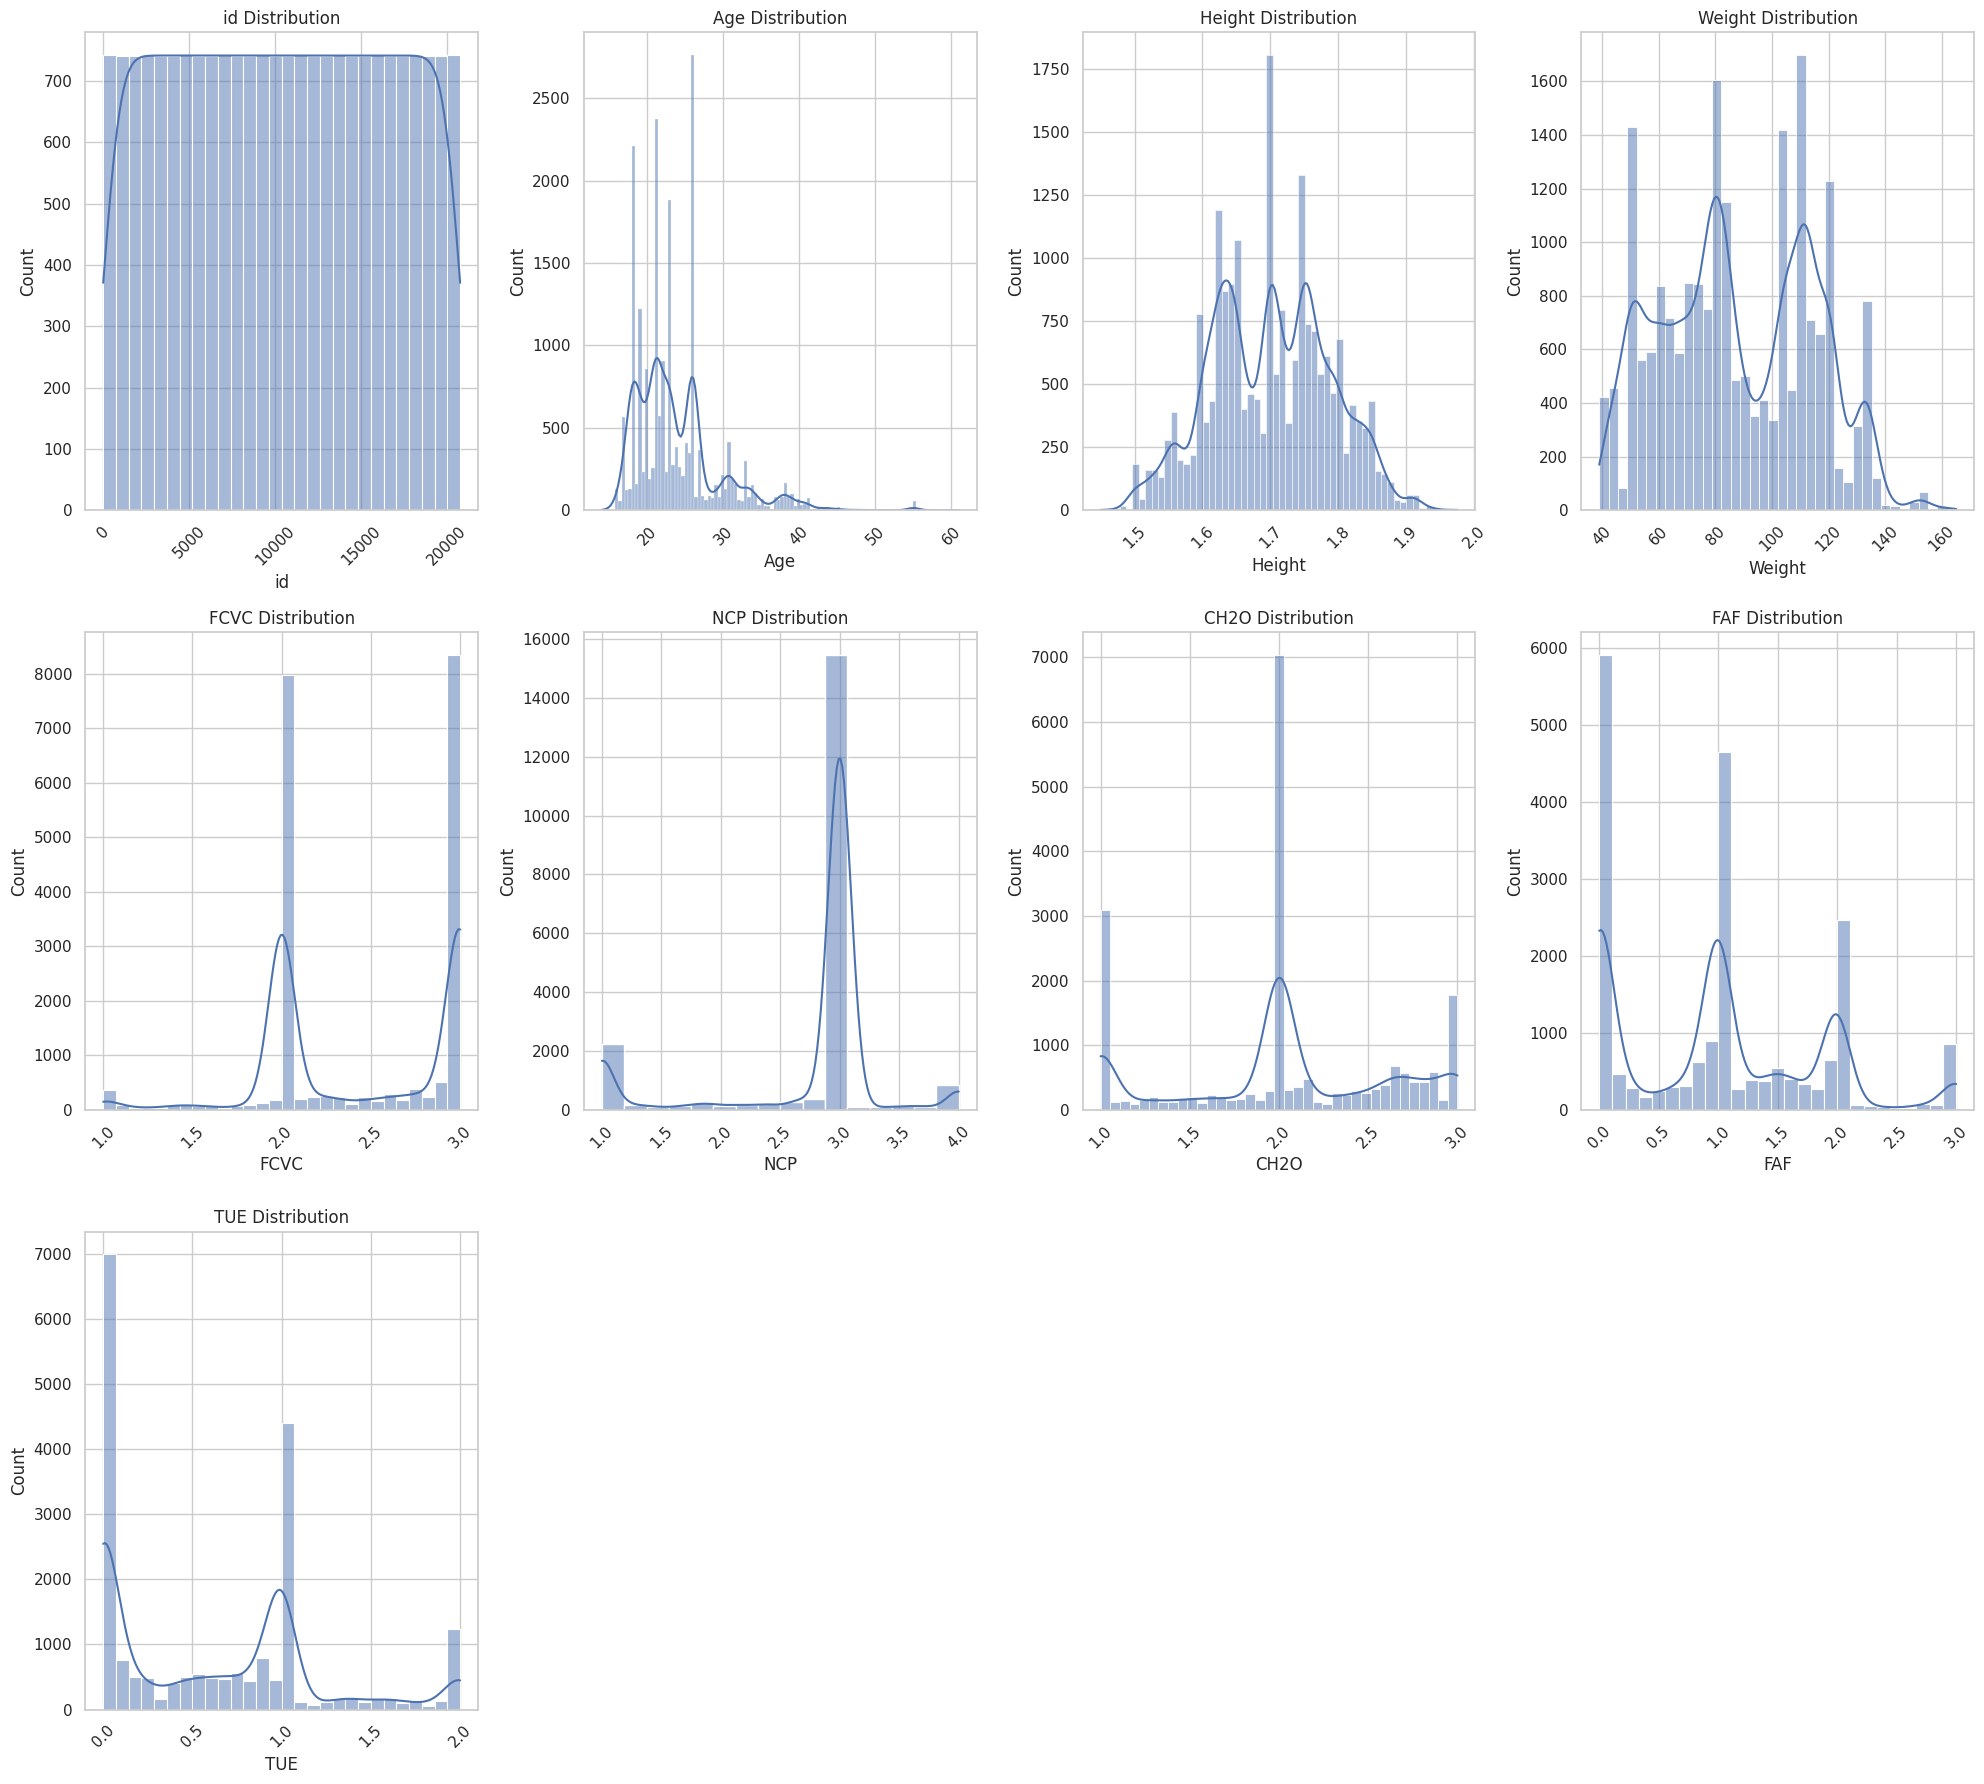

In [9]:
sns.set(style="whitegrid")
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4) 

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Categorical Variable

We will visualize categorical variables! We will use to seaborn and matplotlib.pyplot library to visualize categorical variables. You can see the code in the below!

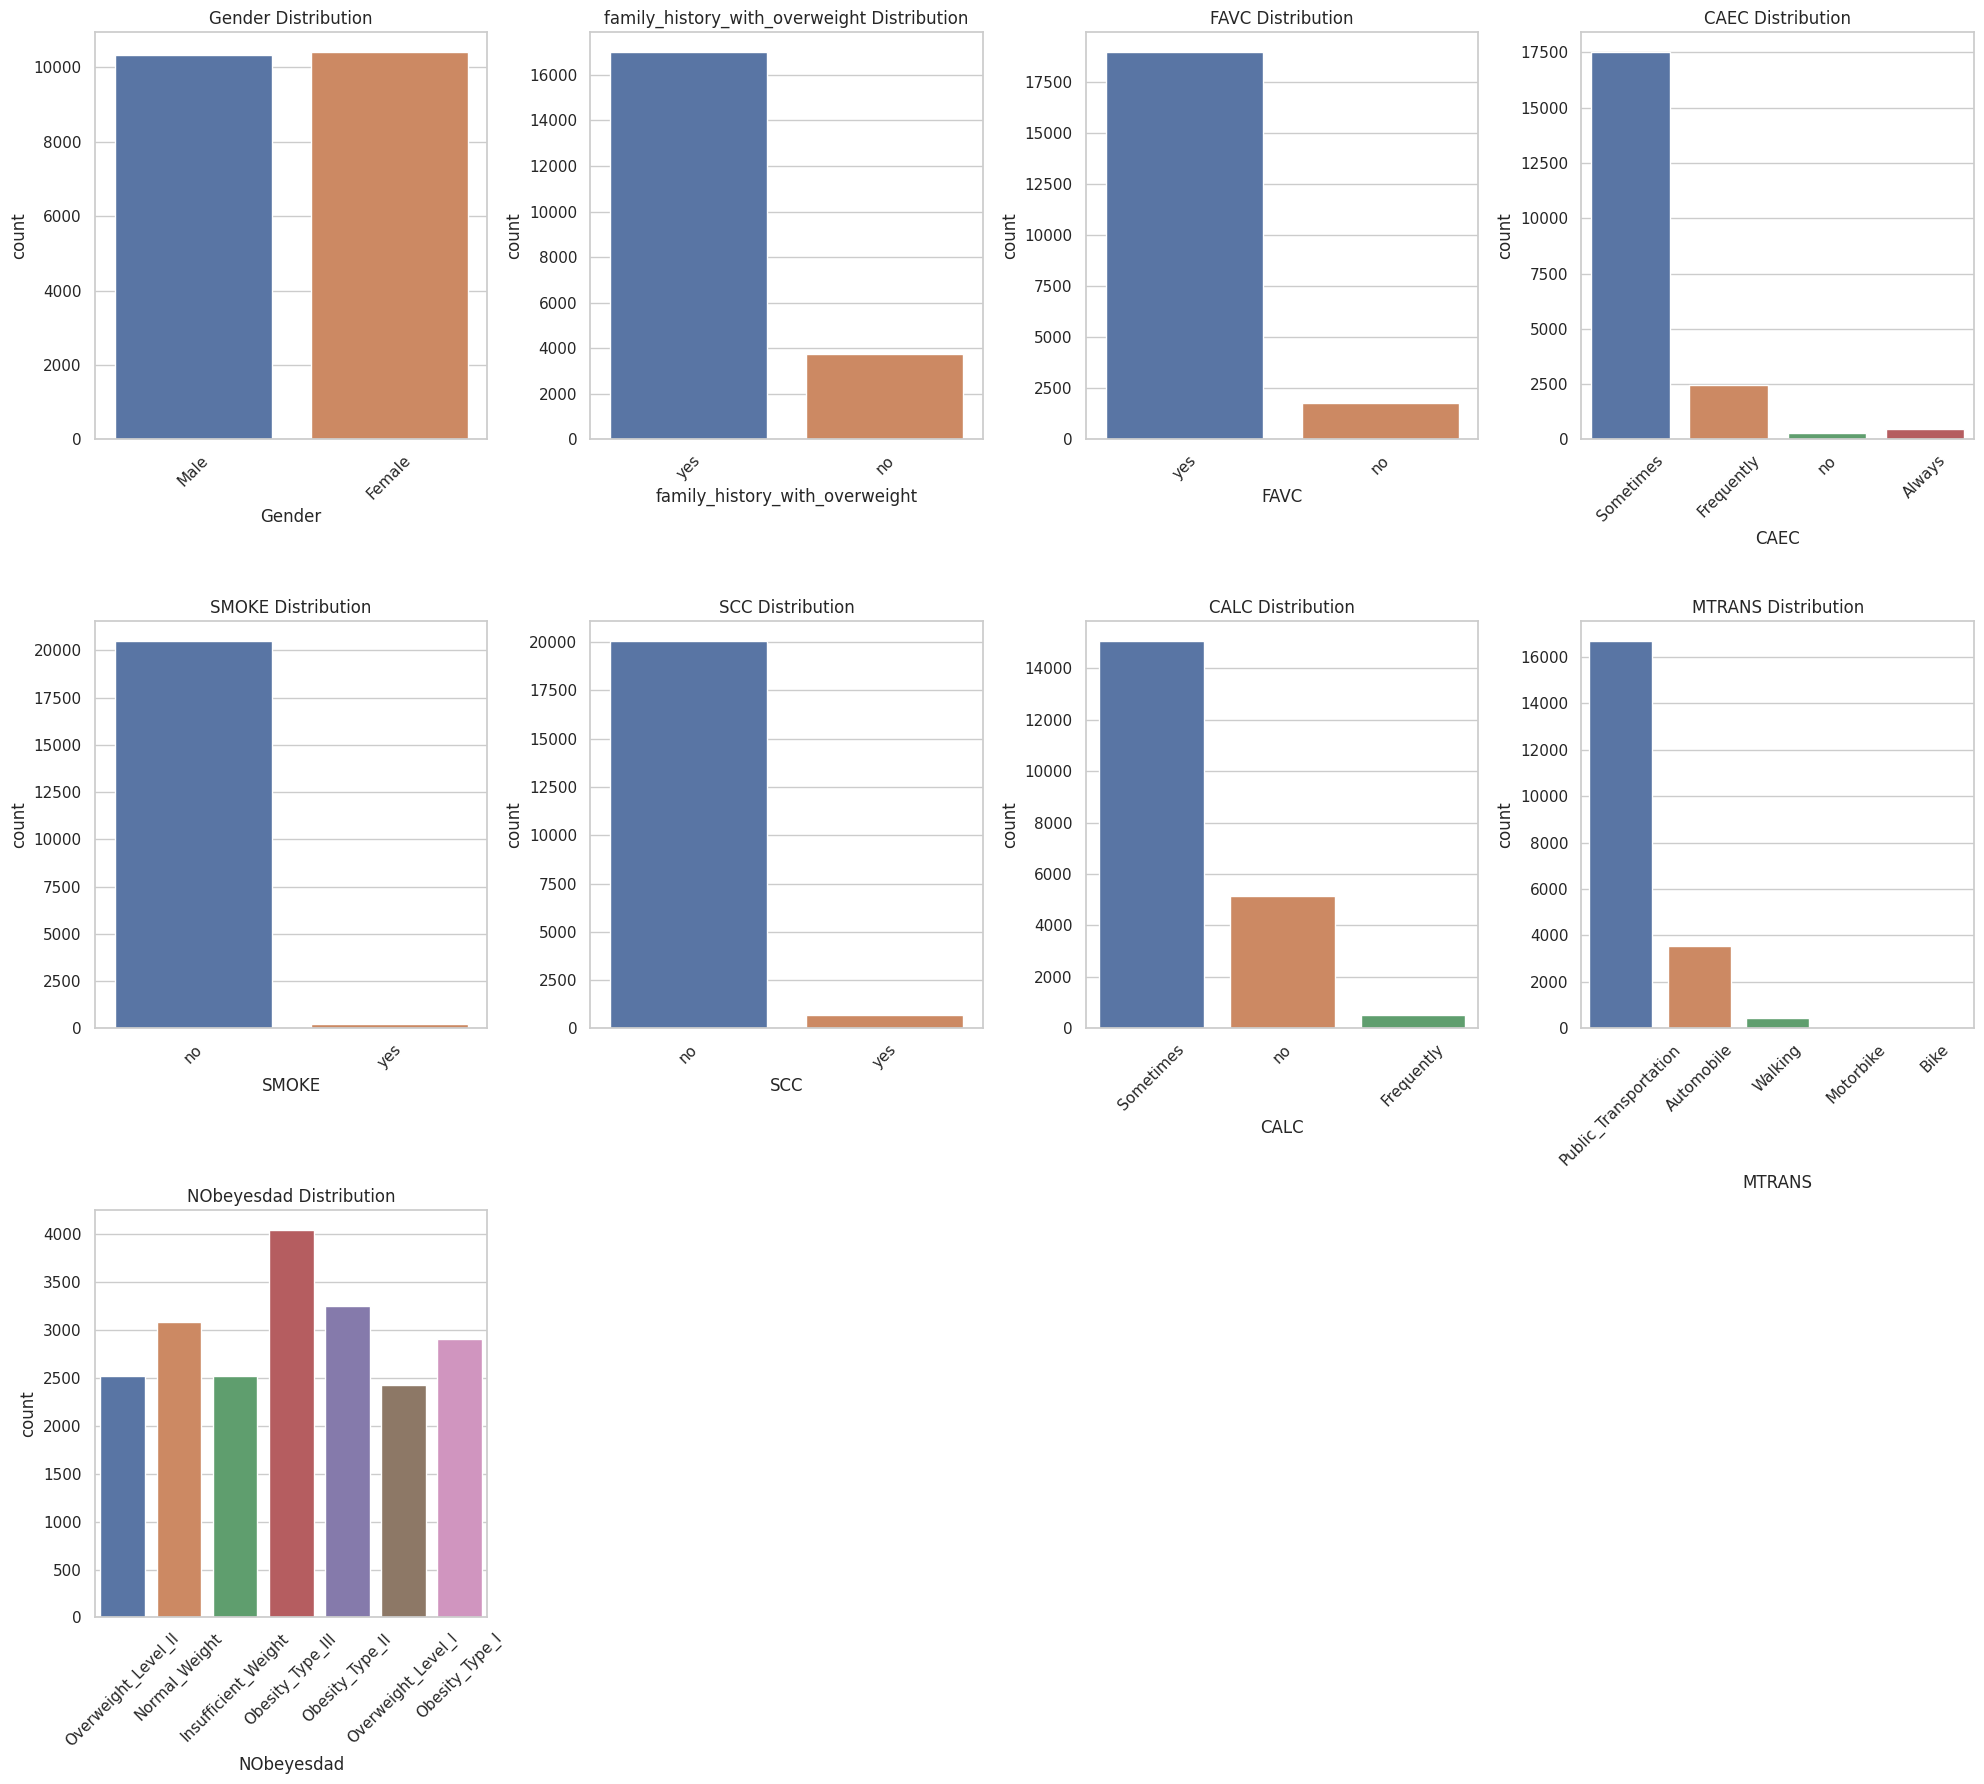

In [10]:
num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sns.countplot(x= col, data=train_df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 


In [11]:
train_df[["Gender","Age"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Age",ascending = False)

,Gender,Age
1,Male,24.221793
0,Female,23.464952


In [12]:
train_df[["Gender","Height"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Height",ascending = False)

,Gender,Height
1,Male,1.754909
0,Female,1.646032


In [13]:
train_df[["Gender","Weight"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Weight",ascending = False)

,Gender,Weight
1,Male,91.029625
0,Female,84.771838


In [14]:
train_df[["SMOKE","Age"]].groupby(["SMOKE"], as_index = False).mean().sort_values(by="Age",ascending = False)

,SMOKE,Age
1,yes,26.756709
0,no,23.806990


In [15]:
train_df[["family_history_with_overweight","Weight"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="Weight",ascending = False)

,family_history_with_overweight,Weight
1,yes,94.249966
0,no,58.975793


In [16]:
train_df[["family_history_with_overweight","FCVC"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="FCVC",ascending = False)

,family_history_with_overweight,FCVC
1,yes,2.457854
0,no,2.391626


In [17]:
train_df[["family_history_with_overweight","NCP"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="NCP",ascending = False)

,family_history_with_overweight,NCP
1,yes,2.776148
0,no,2.694003


<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step. We will apply that steps: 

* **Outlier Detection**

    We will focus IQR test for outlier detection.
    
* **Missing Values**

    We will find and fill missing values.
    
In the end of this part we will visualize some values. We will see correlation matrix.